In [15]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import realcontour_nd
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def Gaussexp(z, lamb):
    return 1j*lamb*(z[0]**2+z[1]**2+z[2]**2)

def gradh(z, lamb):
    return 2*1j*lamb*np.conj(z)


In [17]:
# init model
lamb = 1
delta = 1.0
thresh = -30
tmax = 2.0
dt_init = 1e-3

contour = realcontour_nd(10, (-0.5,0.5,-0.5,0.5,-0.5,0.5))

plind = plmodel(contour, Gaussexp, grad=gradh, expargs=[lamb])

In [18]:
plind.descend(delta, thresh, tmax, dt_init)

/Users/DylanJow/plind/plind/descend/core.py:40: RuntimeWarning: divide by zero encountered in true_divide
  delta = np.min((np.divide(tol,2*R))**(1/4))


total steps: 23 current time: 2.043878569567952


In [19]:
plind.contour.refine_edges(delta/10)

In [20]:
plind.integrate()
print(plind.integral)

((3.9125824156997844-3.9124711395440666j), 0.05318927284032202)


In [21]:
(1j*np.pi)**(3/2)

(-3.9374024864306048+3.937402486430605j)

In [22]:
points = plind.contour.points

In [23]:
points

array([[-1.44249169-1.44142148j,  1.44249169+1.44142148j,
        -1.44249169-1.44142148j],
       [-1.44249169-1.44142148j,  1.44249169+1.44142148j,
         1.44249169+1.44142148j],
       [ 1.44249169+1.44142148j,  1.44249169+1.44142148j,
        -1.44249169-1.44142148j],
       ...,
       [-0.31554506-0.31531095j,  0.40570079+0.40539979j,
         0.18031146+0.18017769j],
       [ 0.1352336 +0.13513326j, -0.1352336 -0.13513326j,
        -0.27046719-0.27026653j],
       [ 0.1352336 +0.13513326j,  0.22538933+0.22522211j,
        -0.63109012-0.6306219j ]])

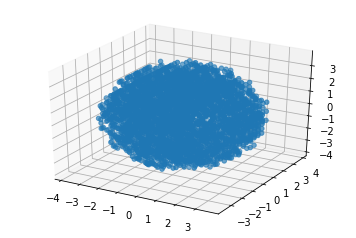

In [24]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:,0].real, points[:,1].real, points[:,2].real)
plt.show()